In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')
df.shape

(150, 6)

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Sepal length vs Sepal Width (Setosa vs Versicolor)

In [5]:
df0 = df[:50] # setosa
df1 = df[50:100] #versicolor
df2 = df[100:] #verginica

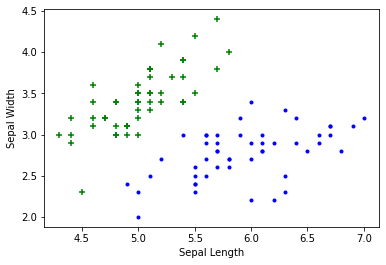

In [6]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['SepalLengthCm'], df0['SepalWidthCm'],color="green",marker='+')
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'],color="blue",marker='.')

### Petal length vs Pepal Width (Setosa vs Versicolor)

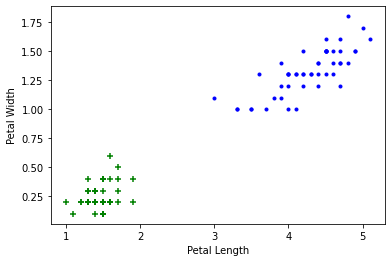

In [7]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'],color="green",marker='+')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'],color="blue",marker='.')

### splitting data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [10]:
len(X_train)

120

In [11]:
len(X_test)

30

### Create KNN (K Neighrest Neighbour Classifier)



In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)


In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
knn.score(X_test,y_test)

0.9666666666666667

In [15]:
knn.predict([[4.8,3.0,1.5,0.3]])

array(['Iris-setosa'], dtype=object)

#### Plot Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(42.0, 0.5, 'Truth')

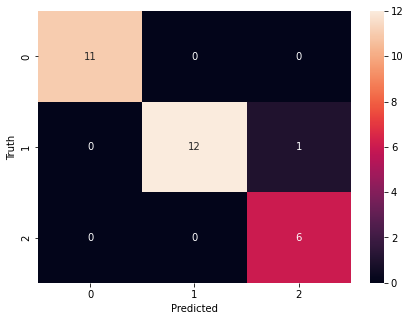

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')